In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

making controlled-z from cnot

HXH = Z / HZH = X 임을 이용하여 구현

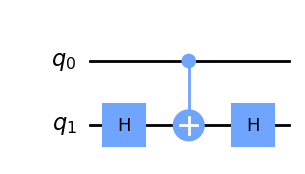

In [3]:
qc = QuantumCircuit(2)
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

cnot을 이용하여 controlled-y 게이트 구현

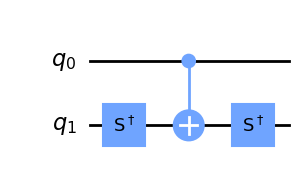

In [4]:
qc = QuantumCircuit(2)
qc.sdg(t)
qc.cx(c,t)
qc.sdg(t)
qc.draw()

controlled-h

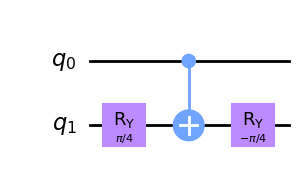

In [6]:
qc = QuantumCircuit(2)
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()

controllrd rotations

arbitrary rotations around the y axis

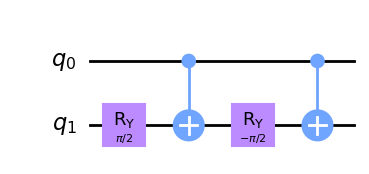

In [7]:
qc = QuantumCircuit(2)
#arbitarary 이기에 theta = pi
#theta값은 임의로 조정 가능
theta = pi
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()

세가지 rotation A,B,C와 phase a 를 이용해 single-qubit rotation V를 얻을 수 있음
ABC = I  /  e^(ia)AZBZC = V

첫 controlled-z 게이트를 이용하여 상태가 |0>일때를 다루고 두번째 게이트로 상태가 |1>일때를 다룰수 있다


In [8]:
A = Gate('A',1,[])
B = Gate('B',1,[])
C = Gate('C',1,[])
alpha = 1

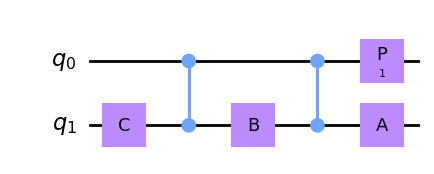

In [9]:
qc = QuantumCircuit(2)
qc.append(C,[t])
qc.cz(c,t)
qc.append(B,[t])
qc.cz(c,t)
qc.append(A,[t])
qc.p(alpha,c)
qc.draw()

the toffoli

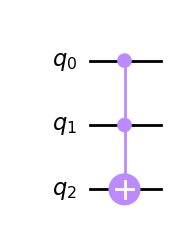

In [11]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
qc.ccx(a,b,t)
qc.draw()

ccx게이트를 single / two-qubit gate로 만들기 위해서 arbitary controlled-controlled-U 구현이 도움이 된다

V = sqrt(U)로 정의한다 

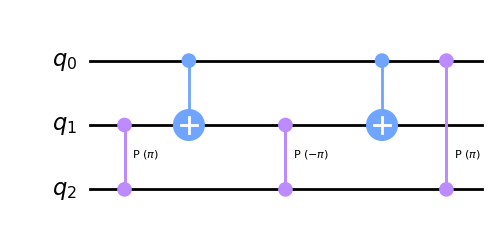

In [12]:
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw()

toffoli gate는 여러 방법으로 구현가능하다

아래는ch 와 cz 게이트를 이용하여 구현한 cnot게이트

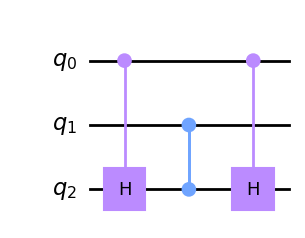

In [13]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw()

Arbitrary rotations from H and T

정확성에는 한계가 있기 때문에 오류가 존재하고 회로가 커질수록 불완전함이 점점 커진다
따라서 single-qubit rotation은 fault-tolrtant quantum computer에선 사용할 수 없다

대신 fault-tolerant 스키마를 사용하는데 이것은 H와 T(= Z**0.25) 2개의 게이트로만 구성된다

T 게이트

z축을 기준으로 pi/4만큼 회전하며 Rz(pi/4) = e^(i*pi/8Z)로 표현됨

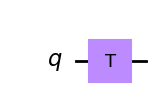

In [14]:
qc = QuantumCircuit(1)
qc.t(0)
qc.draw()

H와 T게이트가 완벽하다고 가정하면 이 게이트들을 통해 error correction과 fault-tolerant에 적합한 회로를 만들 수 있다

HTH로 회로를 구성하여 X 게이트와 유사한 회전을 만들 수 있다

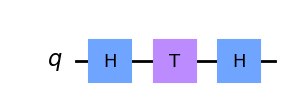

In [15]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

Rz(pi/4)Rx(pi/4) 게이트 만들기

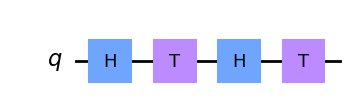

In [16]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()

결합된 회전을 n회 반복하는것은 다른 각도로 같은 축을 기준으로 회전하는 것을 의미한다

pigeonhole 원칙에 의해 위의 게이트를 반복함으로써 우리가 원하는 만큼의 작은 각도로 회전시킬 수 있다